In [2]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt 
from scipy.optimize import Bounds, BFGS
from scipy.optimize import LinearConstraint, minimize
from matplotlib.colors import ListedColormap
import seaborn as sns
import sklearn.datasets as dt
from math import log, e, sqrt,comb
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
# Ignore all warnings (not recommended)
warnings.filterwarnings("ignore")

In [4]:
dataset=pd.read_csv("Medical_insurance.csv")

In [5]:
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [7]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
x = dataset.iloc[:, :-1] . values
y = dataset.iloc[:, -1] . values

In [9]:
from sklearn.preprocessing import LabelEncoder
labelencoder_x=LabelEncoder()

In [10]:
x[:, 0]=labelencoder_x.fit_transform(x[:, 0])

In [11]:
x[:, 1]=labelencoder_x.fit_transform(x[:, 1])

In [12]:
x[:, 2]=labelencoder_x.fit_transform(x[:, 2])

In [13]:
x[:, 3]=labelencoder_x.fit_transform(x[:, 3])

In [14]:
x[:, 4]=labelencoder_x.fit_transform(x[:, 4])

In [15]:
x[:, 5]=labelencoder_x.fit_transform(x[:, 5])

In [16]:
x

array([[1, 0, 197, 0, 1, 3],
       [0, 1, 350, 1, 0, 2],
       [10, 1, 331, 3, 0, 2],
       ...,
       [1, 1, 151, 1, 1, 1],
       [5, 1, 17, 0, 0, 1],
       [36, 1, 294, 0, 0, 3]], dtype=object)

In [17]:
labelencoder_y=LabelEncoder()

In [18]:
y=labelencoder_y.fit_transform(y)

In [19]:
y

array([1005,   57,  306, ...,  998, 1089,  697], dtype=int64)

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [21]:
x_train.shape, x_test.shape

((2217, 6), (555, 6))

In [22]:
y_train.shape, y_test.shape

((2217,), (555,))

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [25]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [26]:
model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=0)
model.fit(x_train, y_train)

Ridge(alpha=100, random_state=0, solver='cholesky')

In [27]:
test_pred = model.predict(x_test)
train_pred = model.predict(x_train)

In [28]:
def print_evaluate(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_true, y_pred)

    print(f'MAE: {mae}')
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print(f'R-squared: {r2}')

In [29]:
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 141.33387799571884
MSE: 37909.14071717674
RMSE: 194.70269827913722
R-squared: 0.7551722490515337
Train set evaluation:
_____________________________________
MAE: 142.66233712174304
MSE: 39738.90926724064
RMSE: 199.34620454686527
R-squared: 0.7326427102315791


In [30]:
def evaluate(model, x, y):
    scores = cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv=5)
    rmse_scores = np.sqrt(-scores)
    mean_rmse = rmse_scores.mean()
    return mean_rmse 

In [31]:
results_df = pd.DataFrame(data=[[ "Ridge Regression", 
                                  mean_absolute_error(y_test,test_pred), 
                                  mean_squared_error(y_test,test_pred), 
                                  np.sqrt(mean_squared_error(y_test,test_pred)), 
                                  r2_score(y_test,test_pred), 
                                  evaluate(Ridge(alpha=100,solver='cholesky',tol=0.0001), x_test,y_test)]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

In [32]:
y_pred=model.predict(x_test)
y_pred

array([ 249.94919775,  252.77100883,  503.86519637,  224.6837649 ,
        767.62807096,  324.59779904,  450.37822886,  356.24389013,
        516.84140569,  784.90406082,  810.61313202,  659.32134792,
        270.43023173,  550.82110725,  434.27952626,  758.45424256,
        746.1875941 ,  737.25000583,  678.54236699,  774.98527182,
        753.57080463,  257.53939085, 1379.09410922,  207.01048445,
        773.70809954, 1036.85154433,  778.64216085,  845.03377367,
       1039.02083282,  683.69856751,  997.34988726,  498.04320367,
        686.79977113,  309.8382706 ,  224.58376056, 1397.88576257,
        698.47922292,  653.39241526,  758.45424256,  485.20986925,
        908.85126981,  206.17265571,  403.12058923,  734.42172733,
        568.29486656, 1197.31294381,  833.31458906,  812.68316622,
        600.67839002,  233.92203537, 1142.00634484,  211.11383897,
        279.78228223,  226.1307345 ,  483.06865796,  395.30042283,
        773.14526346, 1471.36709756,  327.04709633,  942.77773

In [33]:
from sklearn.metrics import r2_score
score = r2_score(y_test[:15], y_pred[:15].ravel())
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 44.0%


In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [36]:
y_pred_gini = clf_gini.predict(x_test)

In [37]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.0036


In [38]:
from sklearn.metrics import r2_score
score = r2_score(y_test[:14], y_pred_gini[:14].ravel())
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is -112.00000000000001%


[Text(0.5, 0.875, 'x[3] <= 4.5\ngini = 0.999\nsamples = 2217\nvalue = [3, 2, 3 ... 2, 1, 1]'),
 Text(0.25, 0.625, 'x[0] <= 45.5\ngini = 0.999\nsamples = 2184\nvalue = [3, 2, 3 ... 2, 1, 1]'),
 Text(0.125, 0.375, 'x[2] <= 529.5\ngini = 0.999\nsamples = 2147\nvalue = [3, 2, 3 ... 2, 1, 1]'),
 Text(0.0625, 0.125, 'gini = 0.999\nsamples = 2117\nvalue = [3, 2, 3 ... 2, 1, 0]'),
 Text(0.1875, 0.125, 'gini = 0.931\nsamples = 30\nvalue = [0, 0, 0 ... 0, 0, 1]'),
 Text(0.375, 0.375, 'x[3] <= 1.5\ngini = 0.944\nsamples = 37\nvalue = [0, 0, 0 ... 0, 0, 0]'),
 Text(0.3125, 0.125, 'gini = 0.929\nsamples = 26\nvalue = [0, 0, 0 ... 0, 0, 0]'),
 Text(0.4375, 0.125, 'gini = 0.76\nsamples = 11\nvalue = [0, 0, 0 ... 0, 0, 0]'),
 Text(0.75, 0.625, 'x[0] <= 27.5\ngini = 0.937\nsamples = 33\nvalue = [0, 0, 0 ... 0, 0, 0]'),
 Text(0.625, 0.375, 'x[2] <= 110.5\ngini = 0.925\nsamples = 27\nvalue = [0, 0, 0 ... 0, 0, 0]'),
 Text(0.5625, 0.125, 'gini = 0.777\nsamples = 11\nvalue = [0, 0, 0 ... 0, 0, 0]'),
 Text(

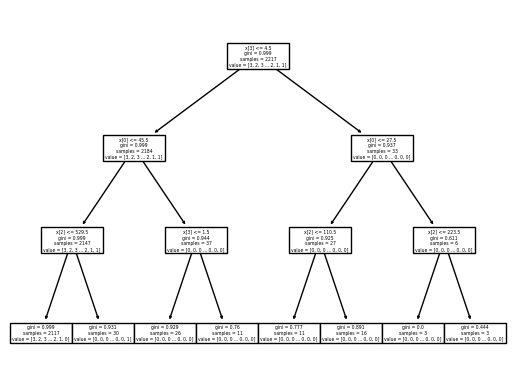

In [39]:
from sklearn import tree
tree.plot_tree(clf_gini.fit(x_train, y_train)) 

[Text(0.5, 0.875, 'x[3] <= 4.5\ngini = 0.999\nsamples = 2217\nvalue = [3, 2, 3 ... 2, 1, 1]'),
 Text(0.25, 0.625, 'x[0] <= 45.5\ngini = 0.999\nsamples = 2184\nvalue = [3, 2, 3 ... 2, 1, 1]'),
 Text(0.125, 0.375, 'x[2] <= 529.5\ngini = 0.999\nsamples = 2147\nvalue = [3, 2, 3 ... 2, 1, 1]'),
 Text(0.0625, 0.125, 'gini = 0.999\nsamples = 2117\nvalue = [3, 2, 3 ... 2, 1, 0]'),
 Text(0.1875, 0.125, 'gini = 0.931\nsamples = 30\nvalue = [0, 0, 0 ... 0, 0, 1]'),
 Text(0.375, 0.375, 'x[3] <= 1.5\ngini = 0.944\nsamples = 37\nvalue = [0, 0, 0 ... 0, 0, 0]'),
 Text(0.3125, 0.125, 'gini = 0.929\nsamples = 26\nvalue = [0, 0, 0 ... 0, 0, 0]'),
 Text(0.4375, 0.125, 'gini = 0.76\nsamples = 11\nvalue = [0, 0, 0 ... 0, 0, 0]'),
 Text(0.75, 0.625, 'x[0] <= 27.5\ngini = 0.937\nsamples = 33\nvalue = [0, 0, 0 ... 0, 0, 0]'),
 Text(0.625, 0.375, 'x[2] <= 110.5\ngini = 0.925\nsamples = 27\nvalue = [0, 0, 0 ... 0, 0, 0]'),
 Text(0.5625, 0.125, 'gini = 0.777\nsamples = 11\nvalue = [0, 0, 0 ... 0, 0, 0]'),
 Text(

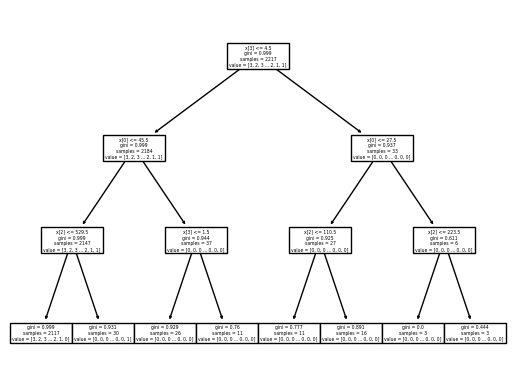

In [40]:
from sklearn import tree
tree.plot_tree(clf_gini.fit(x_train, y_train)) 

In [41]:
# instantiate the DecisionTreeClassifier model with criterion entropy
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# fit the model
clf_en.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [42]:
y_pred_en = clf_en.predict(x_test)

In [43]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.0000


[Text(0.5, 0.875, 'x[2] <= 266.5\nentropy = 10.253\nsamples = 2217\nvalue = [3, 2, 3 ... 2, 1, 1]'),
 Text(0.25, 0.625, 'x[2] <= 159.5\nentropy = 9.263\nsamples = 1103\nvalue = [3, 2, 0 ... 0, 1, 0]'),
 Text(0.125, 0.375, 'x[2] <= 97.5\nentropy = 8.286\nsamples = 552\nvalue = [3, 0, 0 ... 0, 0, 0]'),
 Text(0.0625, 0.125, 'entropy = 7.329\nsamples = 275\nvalue = [3, 0, 0 ... 0, 0, 0]'),
 Text(0.1875, 0.125, 'entropy = 7.244\nsamples = 277\nvalue = [0, 0, 0 ... 0, 0, 0]'),
 Text(0.375, 0.375, 'x[2] <= 212.5\nentropy = 8.241\nsamples = 551\nvalue = [0, 2, 0 ... 0, 1, 0]'),
 Text(0.3125, 0.125, 'entropy = 7.226\nsamples = 277\nvalue = [0, 0, 0 ... 0, 0, 0]'),
 Text(0.4375, 0.125, 'entropy = 7.256\nsamples = 274\nvalue = [0, 2, 0 ... 0, 1, 0]'),
 Text(0.75, 0.625, 'x[2] <= 372.5\nentropy = 9.244\nsamples = 1114\nvalue = [0, 0, 3 ... 2, 0, 1]'),
 Text(0.625, 0.375, 'x[2] <= 318.5\nentropy = 8.25\nsamples = 558\nvalue = [0, 0, 3 ... 2, 0, 0]'),
 Text(0.5625, 0.125, 'entropy = 7.286\nsamples =

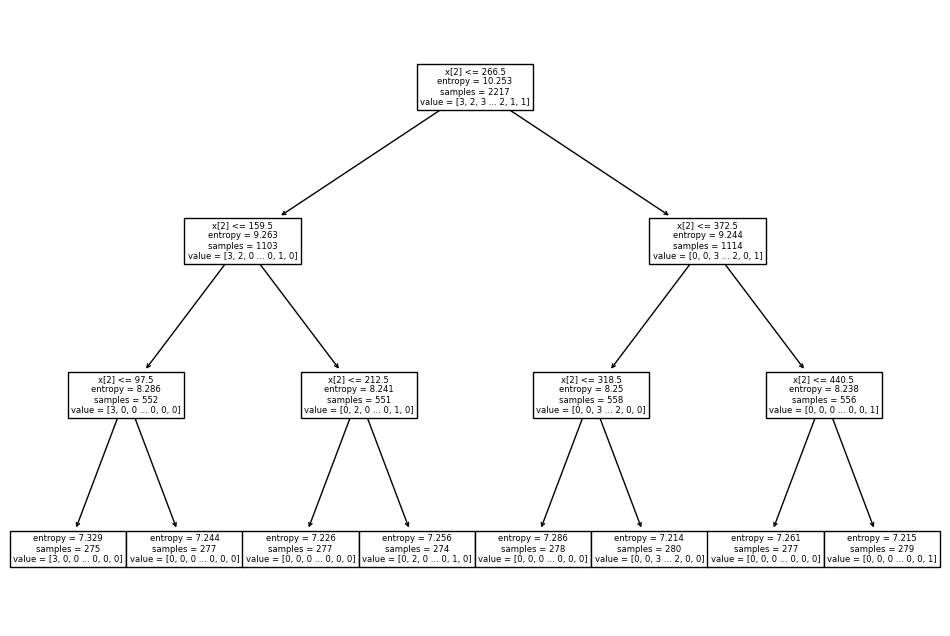

In [44]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_en.fit(x_train, y_train)) 

In [45]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_en)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           2       0.00      0.00      0.00       1.0
           3       0.00      0.00      0.00       1.0
           4       0.00      0.00      0.00       1.0
           7       0.00      0.00      0.00       1.0
          13       0.00      0.00      0.00       1.0
          14       0.00      0.00      0.00       1.0
          17       0.00      0.00      0.00       1.0
          18       0.00      0.00      0.00       1.0
          21       0.00      0.00      0.00       2.0
          22       0.00      0.00      0.00       1.0
          23       0.00      0.00      0.00       1.0
          26       0.00      0.00      0.00       1.0
          28       0.00      0.00      0.00       1.0
          29       0.00      0.00      0.00       1.0
          33       0.00      0.00      0.00       2.0
          37       0.00      0.00      0.00       1.0
          38       0.00    

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
# Define the parameter grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 4, 5, 6, 7]
}

In [49]:
# Instantiate the DecisionTreeClassifier model
clf = DecisionTreeClassifier(random_state=0)

In [50]:
# Instantiate GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=3)

In [51]:
# Fit the grid search to the data
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7]})

In [52]:
print("Best parameters found by grid search:", grid_search.best_params_)

# Get the best model found by GridSearchCV
best_clf = grid_search.best_estimator_

# Use the best model to make predictions and evaluate its accuracy
y_pred_best = best_clf.predict(x_test)
print('Model accuracy score with best parameters: {0:0.4f}'.format(accuracy_score(y_test, y_pred_best)))

Best parameters found by grid search: {'criterion': 'entropy', 'max_depth': 7}
Model accuracy score with best parameters: 0.0378


In [53]:
from sklearn.metrics import r2_score
score = r2_score(y_test[:15], y_pred_best[:15].ravel())
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is -113.99999999999999%


In [54]:
from sklearn.svm import SVC
classcifier = SVC(kernel = 'poly' , degree = 4)
classcifier.fit(x_train,y_train)

SVC(degree=4, kernel='poly')

In [55]:
y_pred = classcifier.predict(x_test)

In [56]:
y_pred

array([ 998,  846, 1144, 1220, 1329,  675,  858,  846, 1144, 1209, 1209,
        327,  856,  411,  675, 1313,  675,  327,  447,  209, 1209,  230,
       1278,  135, 1144,  135, 1144, 1313,  447,  675,  856,  675,  650,
        697, 1209,  858,  697,  858, 1313, 1220,  858,  135, 1220,  675,
        447, 1220,  135,  846,  858, 1209,  615,  846,  327,  675, 1278,
        327, 1144, 1209,  998,  927,  675, 1209, 1144,  697,  697,  846,
       1230,  675,  846,  454,   92,  998,  675, 1209,   92,  998,  846,
        135,  846,  675,  697, 1278, 1278, 1209, 1313,  135,  858,  475,
       1230,  650,  135,  696,  858, 1230,  135, 1209, 1230,  846, 1209,
        846,  675,  846,  846,  447, 1230, 1278,  447, 1230,  697,  650,
       1230,  846, 1220,  650,  675, 1209,  858,  675,  447,  675,  846,
       1209,  135,  846,  188, 1278, 1209,  650, 1209,  188,  846,  650,
        135,  998,  998,  675,  650,  447,  135,  856,  675,  631,  856,
        749,  846,  846,  135,  998,  226, 1144,  8

In [57]:
from sklearn import metrics
print('Accuracy Score On test data:with poly kernel and degree')
print(format(round(metrics.accuracy_score(y_test,y_pred),2)*100))

Accuracy Score On test data:with poly kernel and degree
1.0


In [58]:
from sklearn.metrics import r2_score
score = r2_score(y_test[:15], y_pred[:15].ravel())
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is -148.0%


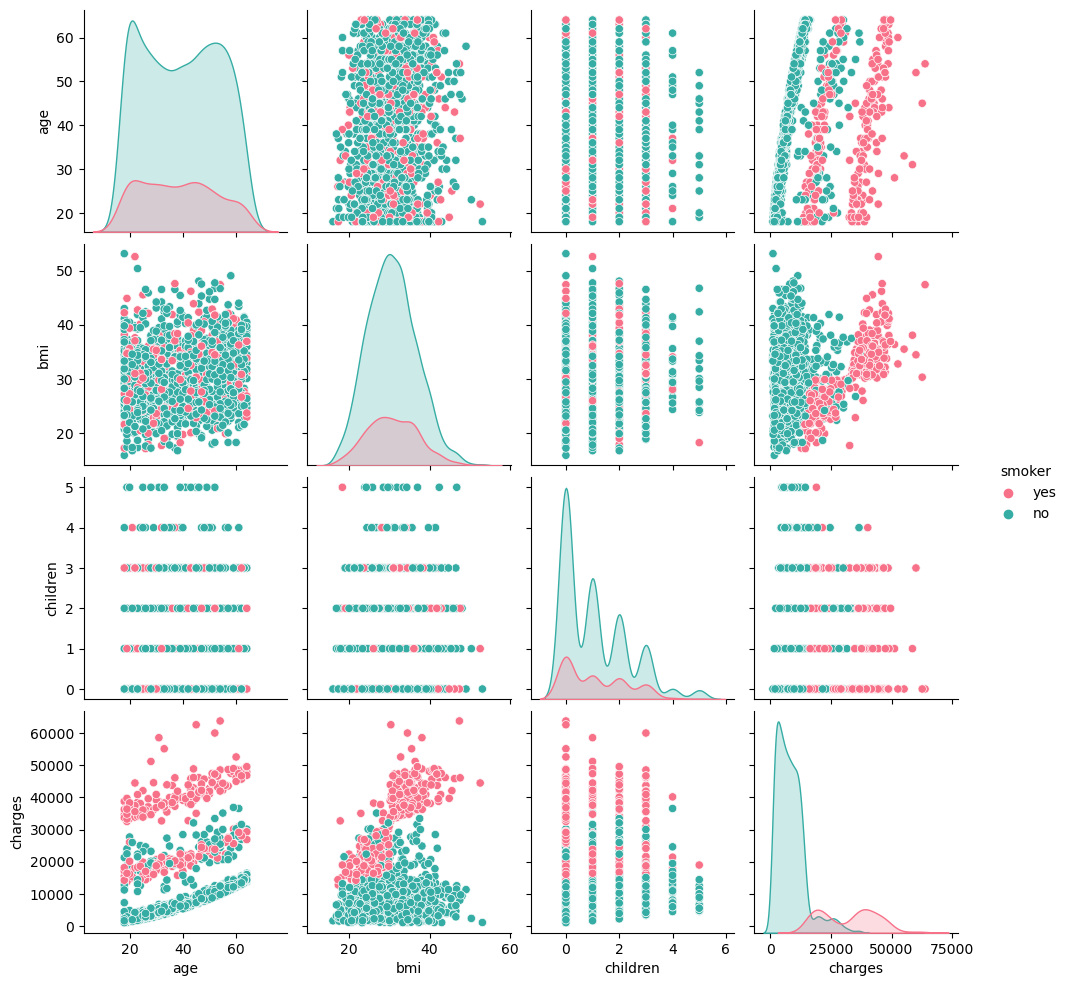

In [59]:
sns.pairplot(dataset, vars=["age", 'bmi','children','charges'],hue='smoker',palette="husl")
plt.show()

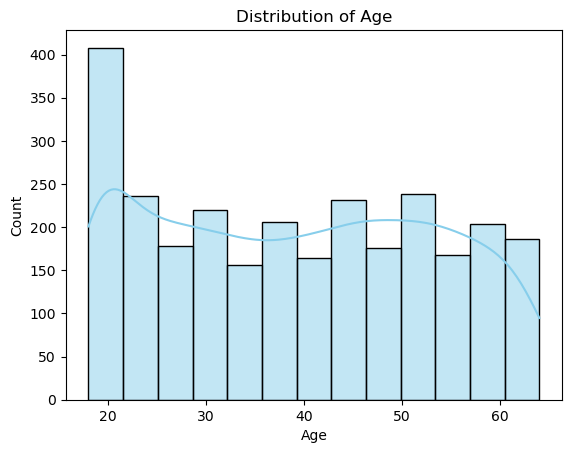

In [60]:
sns.histplot(dataset['age'], kde=True, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

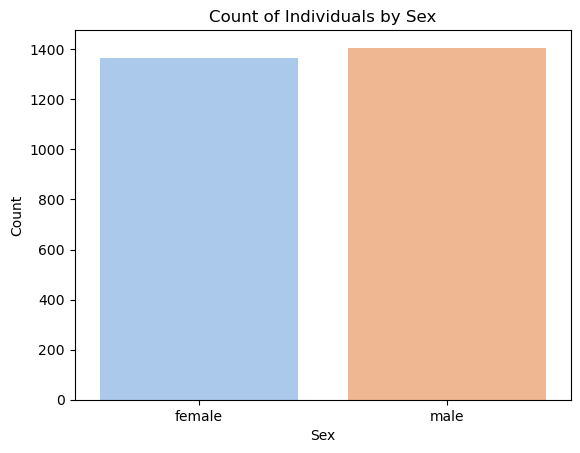

In [61]:
sns.countplot(x='sex', data=dataset, palette='pastel')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Count of Individuals by Sex')
plt.show()

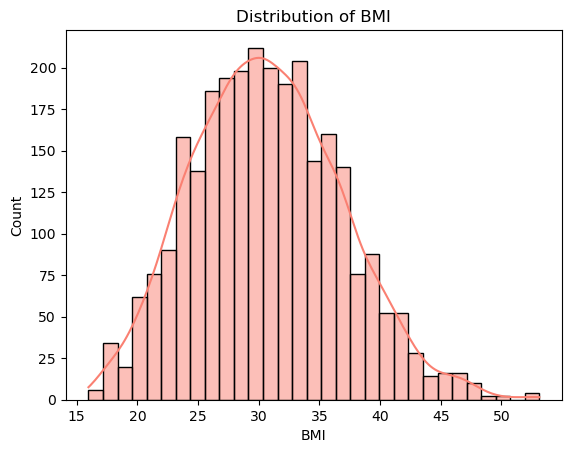

In [62]:
sns.histplot(dataset['bmi'], kde=True, color='salmon')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.title('Distribution of BMI')
plt.show()

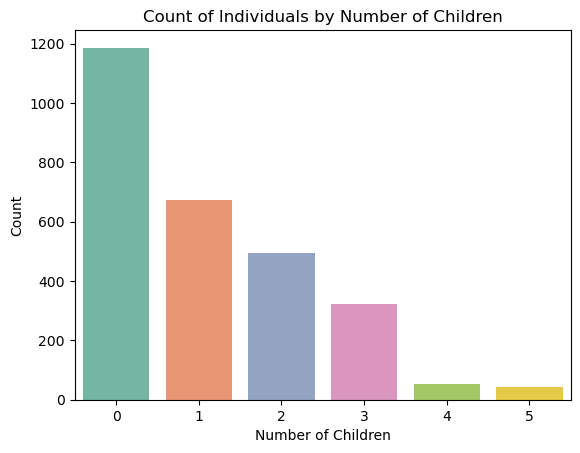

In [63]:
sns.countplot(x='children', data=dataset, palette='Set2')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.title('Count of Individuals by Number of Children')
plt.show()

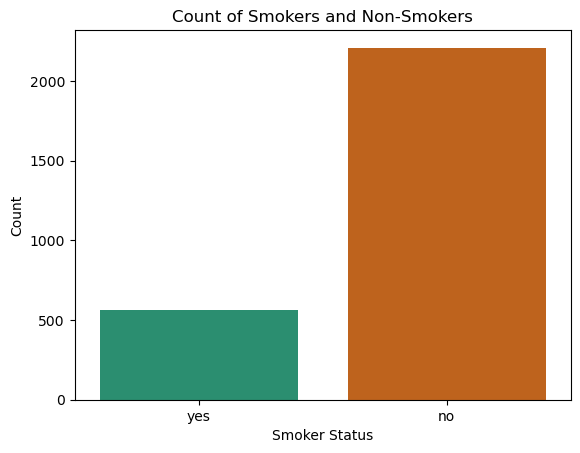

In [64]:
sns.countplot(x='smoker', data=dataset, palette='Dark2')
plt.xlabel('Smoker Status')
plt.ylabel('Count')
plt.title('Count of Smokers and Non-Smokers')
plt.show()

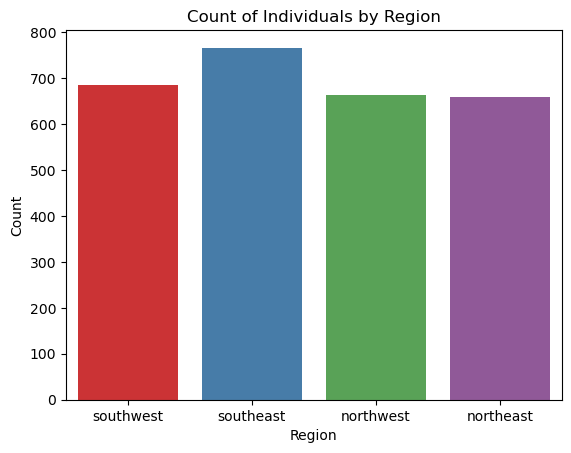

In [65]:
sns.countplot(x='region', data=dataset, palette='Set1')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Count of Individuals by Region')
plt.show()

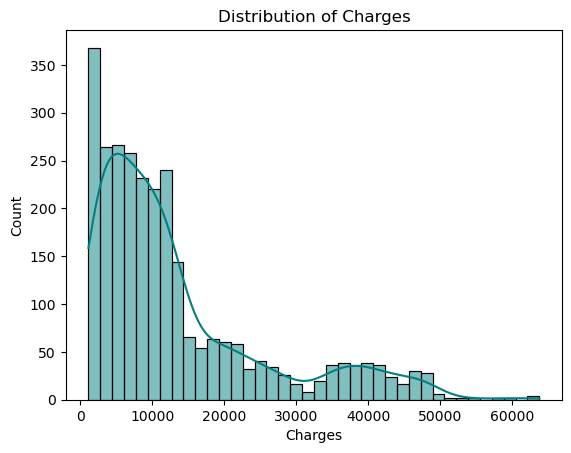

In [66]:
sns.histplot(dataset['charges'], kde=True, color='teal')
plt.xlabel('Charges')
plt.ylabel('Count')
plt.title('Distribution of Charges')
plt.show()

Text(0.5, 1.0, 'Region vs Charges')

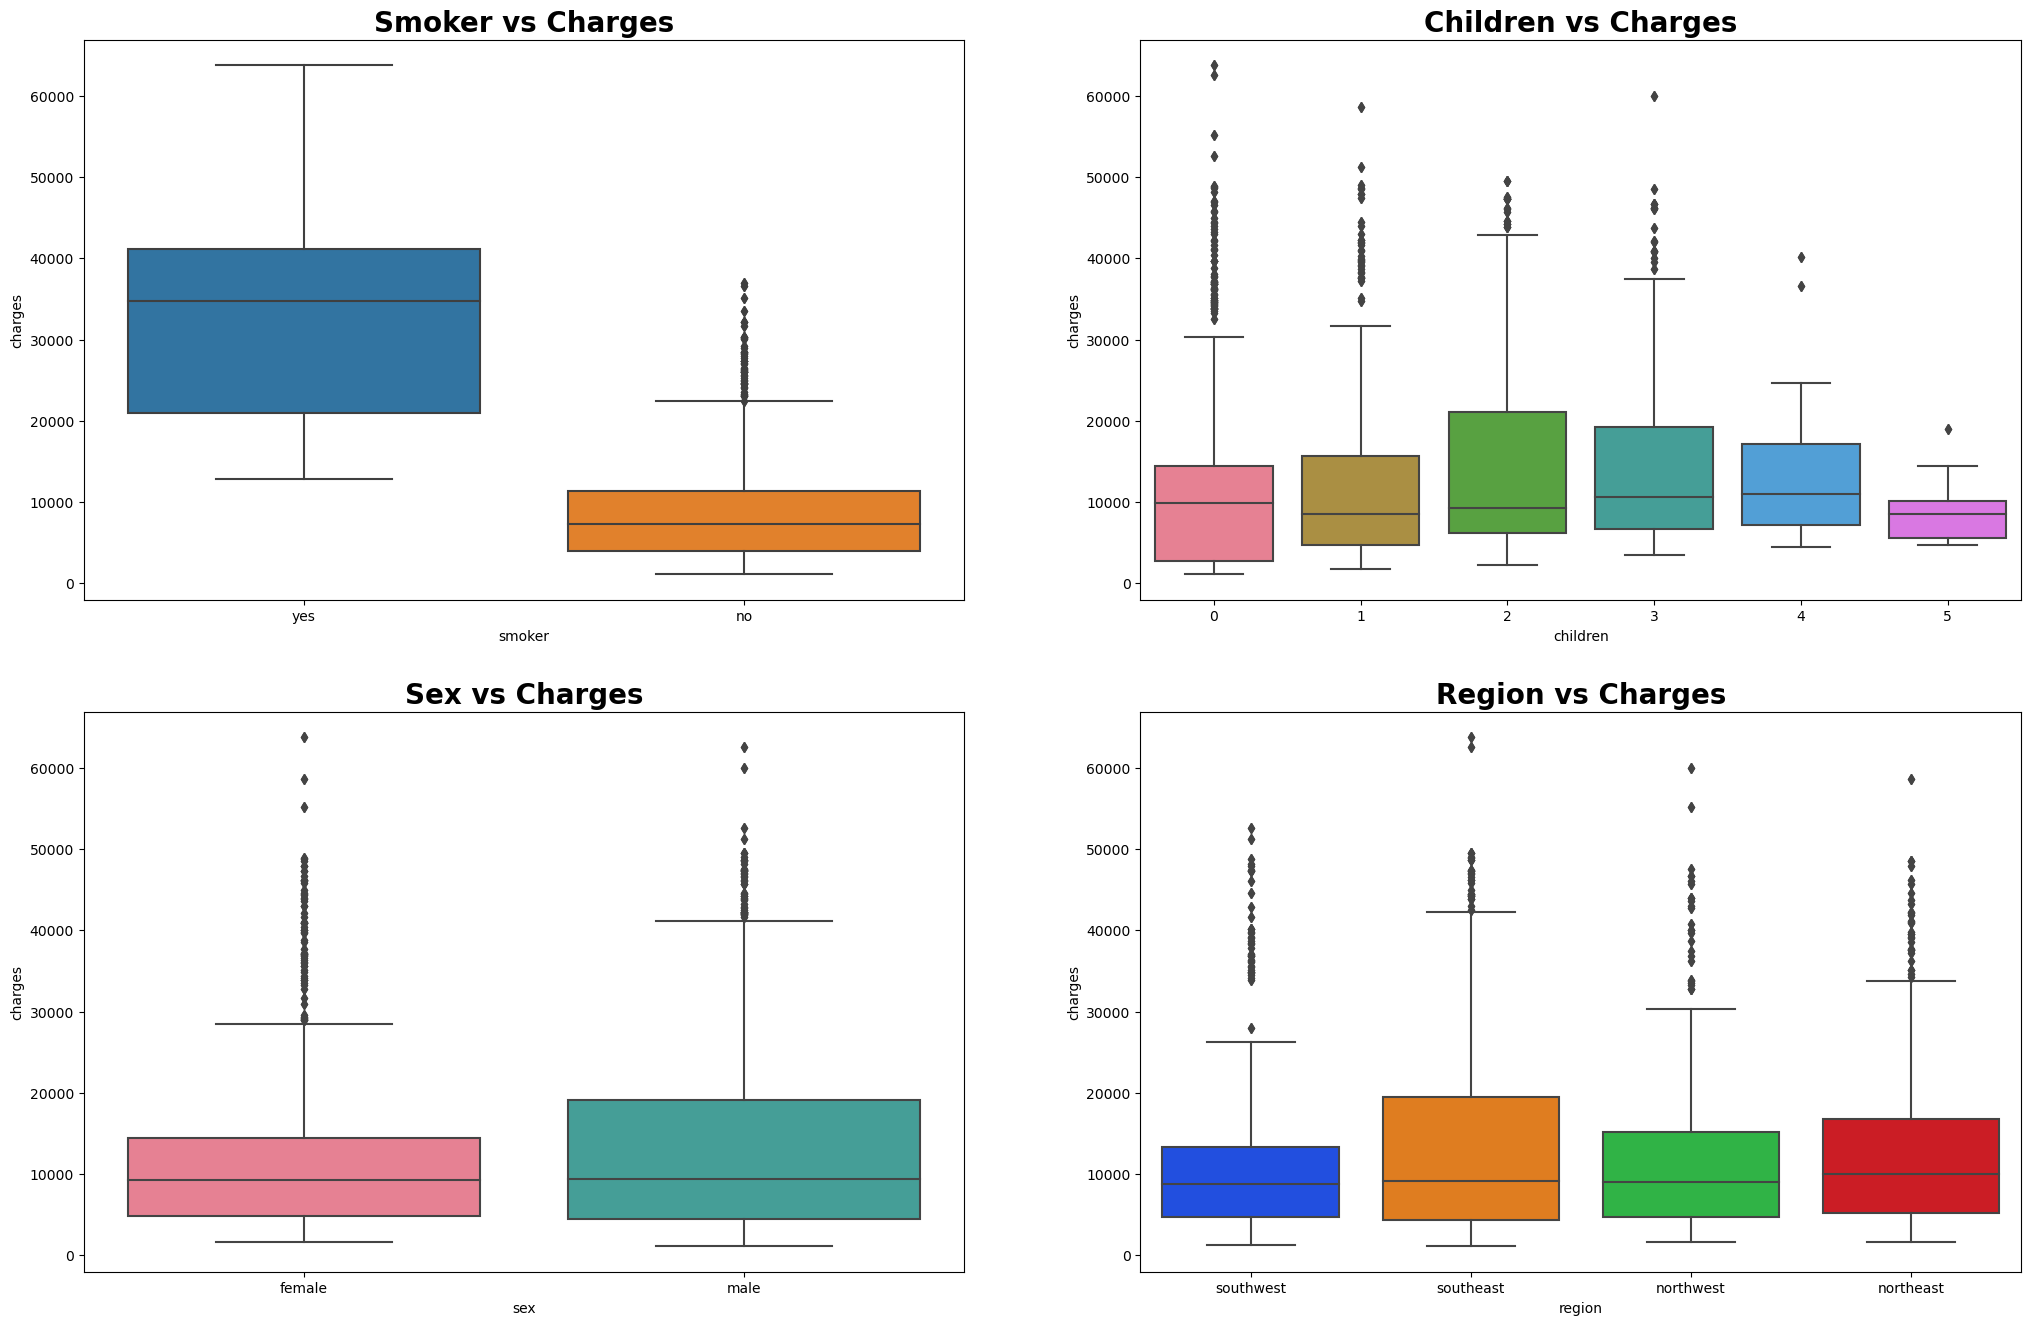

In [67]:
plt.figure(figsize=(25, 16))
plt.subplot(2,2,1)
sns.boxplot(x = 'smoker', y = 'charges', data = dataset)
plt.title('Smoker vs Charges',fontweight="bold", size=20)
plt.subplot(2,2,2)
sns.boxplot(x = 'children', y = 'charges', data = dataset,palette="husl")
plt.title('Children vs Charges',fontweight="bold", size=20)
plt.subplot(2,2,3)
sns.boxplot(x = 'sex', y = 'charges', data = dataset, palette= 'husl')
plt.title('Sex vs Charges',fontweight="bold", size=20)
plt.subplot(2,2,4)
sns.boxplot(x = 'region', y = 'charges', data = dataset,palette="bright")
plt.title('Region vs Charges',fontweight="bold", size=20)

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

In [69]:
dataset_model = DecisionTreeRegressor()
dataset_model.fit(x_train, y_train)

DecisionTreeRegressor()

In [70]:
y_pred1 = dataset_model.predict(x_test)

In [71]:
dataset_mse = mean_squared_error(y_test, y_pred1)
dataset_rmse = mean_squared_error(y_test, y_pred1, squared=False)
dataset_mae = mean_absolute_error(y_test, y_pred1)
dataset_r2 = r2_score(y_test, y_pred1)

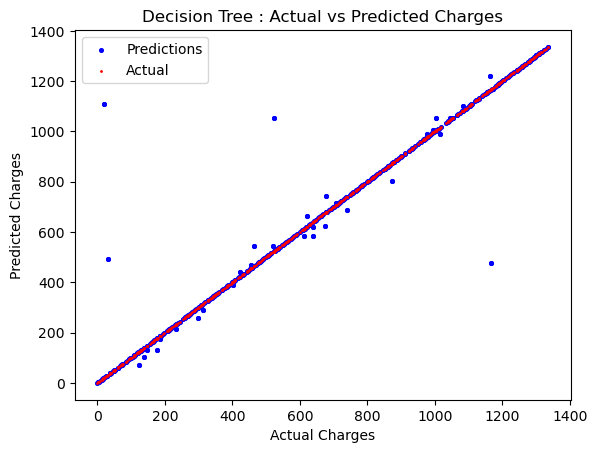

Mean Squared Error (MSE): 7933.708108108108
Root Mean Squared Error (RMSE): 89.07136525341973
Mean Absolute Error (MAE): 13.6
R-squared (R2) Score: 0.9487619113479505


In [72]:
plt.scatter(y_test, y_pred1, color='blue', label='Predictions', s=7)
plt.scatter(y_test, y_test, color='red', label='Actual',s=1)

plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Decision Tree : Actual vs Predicted Charges')
plt.legend()
plt.show()

# Printing metrics
print('Mean Squared Error (MSE):', dataset_mse)
print('Root Mean Squared Error (RMSE):', dataset_rmse)
print('Mean Absolute Error (MAE):', dataset_mae)
print('R-squared (R2) Score:', dataset_r2)

In [73]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

In [74]:
y_pred2 = lr_model.predict(x_test)

In [75]:
lr_mse = mean_squared_error(y_test, y_pred2)
lr_rmse = mean_squared_error(y_test, y_pred2, squared=False)
lr_mae = mean_absolute_error(y_test, y_pred2)
lr_r2 = r2_score(y_test, y_pred2)

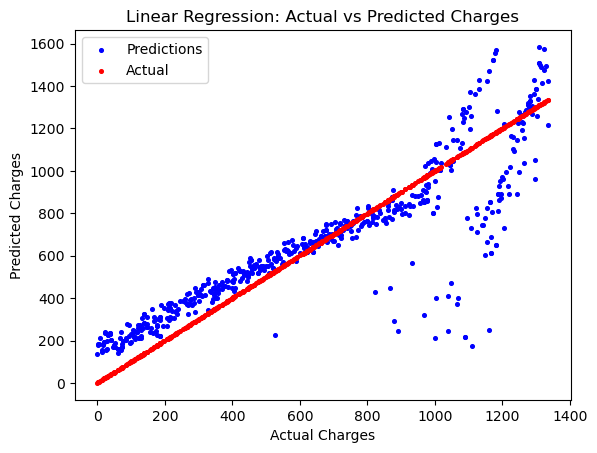

Mean Squared Error (MSE): 34728.58498725523
Root Mean Squared Error (RMSE): 186.35607043306968
Mean Absolute Error (MAE): 125.02516556275074
R-squared (R2) Score: 0.7757131605940134


In [76]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred2, color='blue', label='Predictions', s=7)
plt.scatter(y_test, y_test, color='red', label='Actual',s=7)

plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Linear Regression: Actual vs Predicted Charges')
plt.legend()
plt.show()

# Printing metrics
print('Mean Squared Error (MSE):', lr_mse)
print('Root Mean Squared Error (RMSE):', lr_rmse)
print('Mean Absolute Error (MAE):', lr_mae)
print('R-squared (R2) Score:', lr_r2)


In [79]:
sns.heatmap(dataset.corr(), cmap='Blues', annot=True)
plt.title('Correlation Matrix');

ValueError: could not convert string to float: 'female'